# 📊 Bank Marketing Campaign Analysis

## Objective
The goal of this project is to analyze a bank's marketing campaign data and identify
which factors influence whether a client subscribes to a term deposit.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('bank-full.csv')

len(df)

45211

## Dataset
- Source: [UCI Bank Marketing Dataset](https://www.kaggle.com/datasets/jiraleelas/uci-bank-marketing-full-dataset)
- Rows: 45311
- Columns: 17
- Target variable: y (whether client subscribed)


We first check:
- Data types: 7 string/object, 3 integer, 4 boolean (cols)
- Missing values: no null values found
- Duplicates: no duplicate value

In [ ]:
#basic info Data quality check
def info_df(data):
  return df.info()
def describe_df(data):
  return df.describe()
def nan_values(data):
  return df.isna().sum()
def duplicated_val(data):
  return df.duplicated().sum()

info_df(df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12740 entries, 0 to 12739
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        12740 non-null  int64  
 1   job        12740 non-null  object 
 2   marital    12739 non-null  object 
 3   education  12739 non-null  object 
 4   default    12739 non-null  object 
 5   balance    12739 non-null  float64
 6   housing    12739 non-null  object 
 7   loan       12739 non-null  object 
 8   contact    12739 non-null  object 
 9   day        12739 non-null  float64
 10  month      12739 non-null  object 
 11  duration   12739 non-null  float64
 12  campaign   12739 non-null  float64
 13  pdays      12739 non-null  float64
 14  previous   12739 non-null  float64
 15  poutcome   12739 non-null  object 
 16  y          12739 non-null  object 
dtypes: float64(6), int64(1), object(10)
memory usage: 1.7+ MB


## Do categorical features affect the subscription rate?
### such as Job, martial, education,default, housing(people who took house loan), loan(people who took personal loan), contact, month, poutcome?


JOB vs Subscription Rate (%)
y                yes     no
job                        
student        28.68  71.32
retired        22.79  77.21
unemployed     15.50  84.50
management     13.76  86.24
admin.         12.20  87.80
self-employed  11.84  88.16
unknown        11.81  88.19
technician     11.06  88.94
services        8.88  91.12
housemaid       8.79  91.21
entrepreneur    8.27  91.73
blue-collar     7.27  92.73


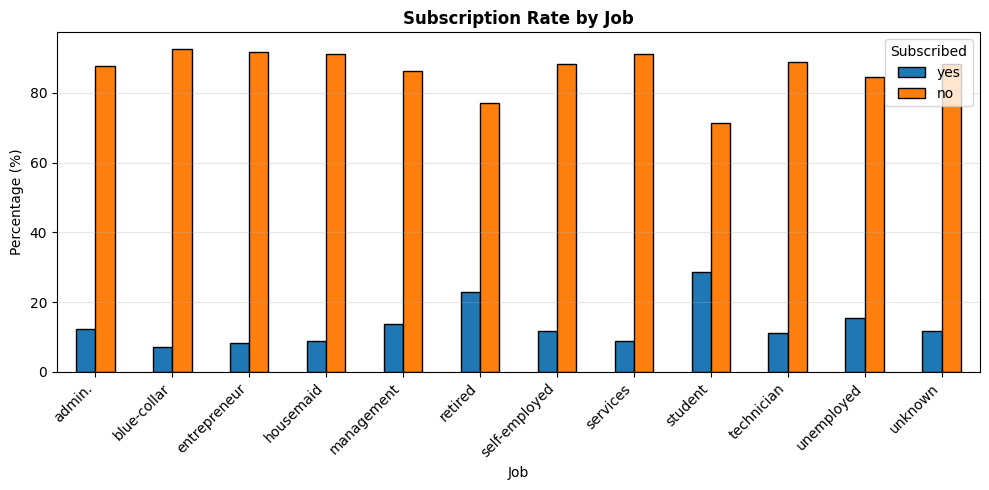

MARITAL vs Subscription Rate (%)
y           yes     no
marital               
single    14.95  85.05
divorced  11.95  88.05
married   10.12  89.88


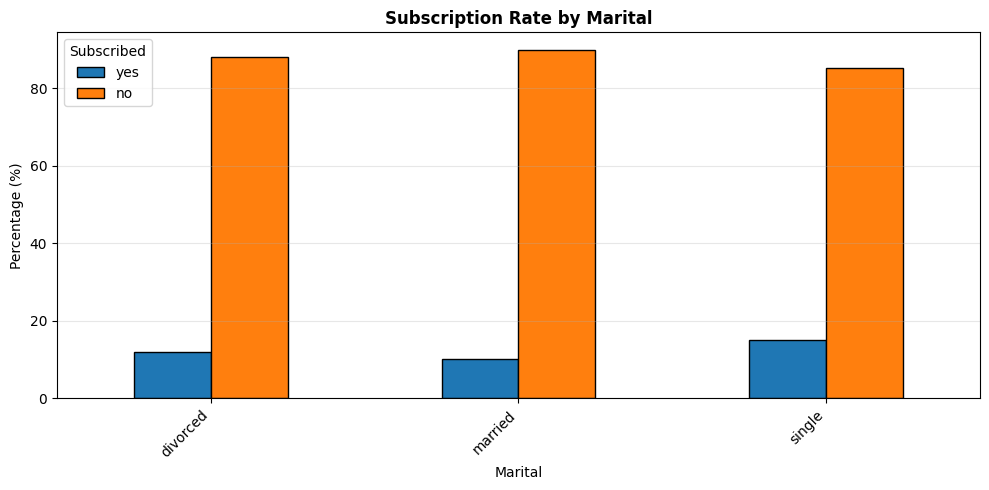

EDUCATION vs Subscription Rate (%)
y            yes     no
education              
tertiary   15.01  84.99
unknown    13.57  86.43
secondary  10.56  89.44
primary     8.63  91.37


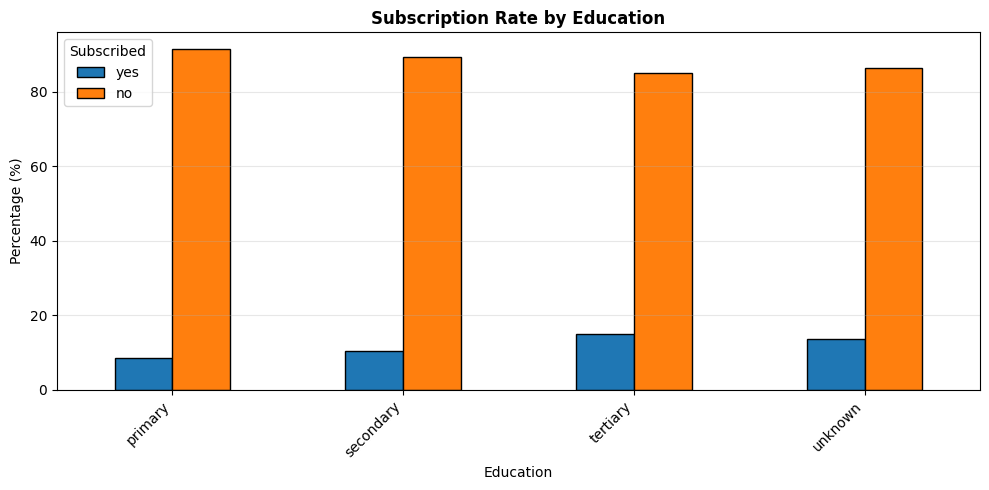

DEFAULT vs Subscription Rate (%)
y          yes     no
default              
no       11.80  88.20
yes       6.38  93.62


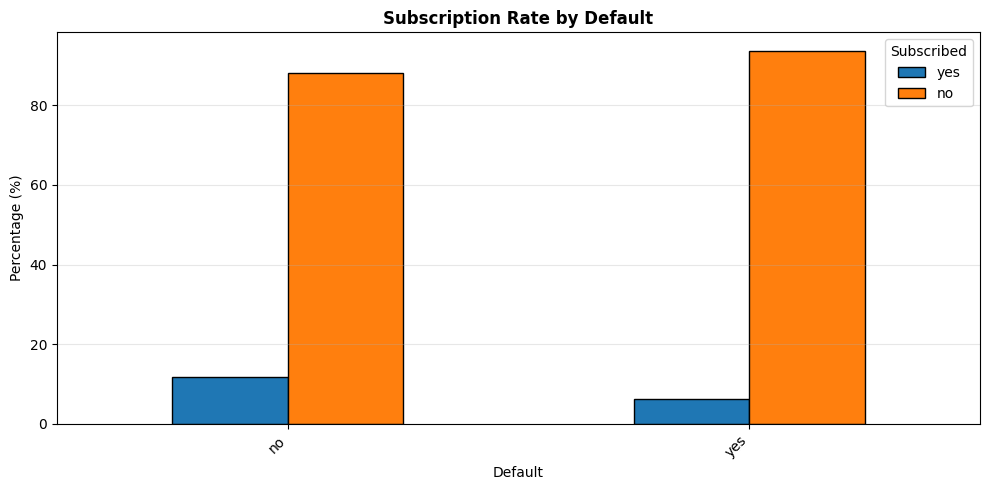

HOUSING vs Subscription Rate (%)
y         yes    no
housing            
no       16.7  83.3
yes       7.7  92.3


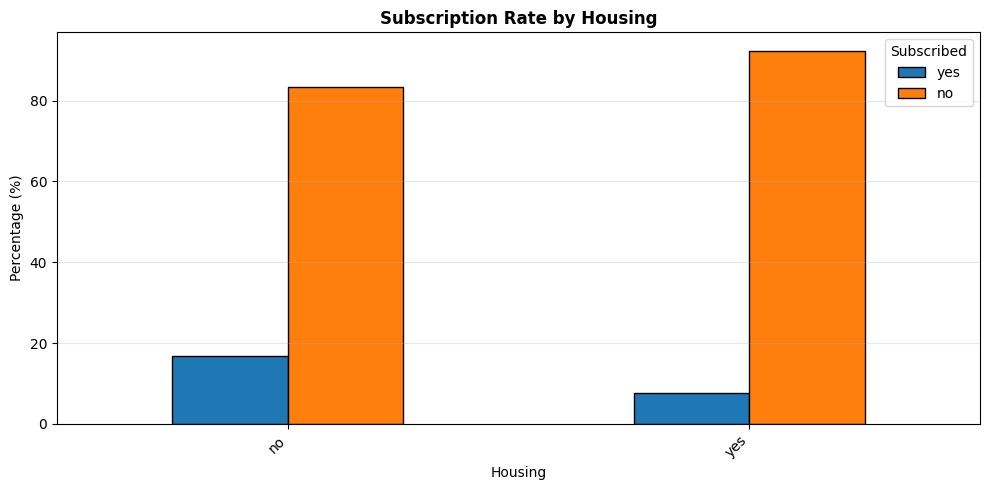

LOAN vs Subscription Rate (%)
y       yes     no
loan              
no    12.66  87.34
yes    6.68  93.32


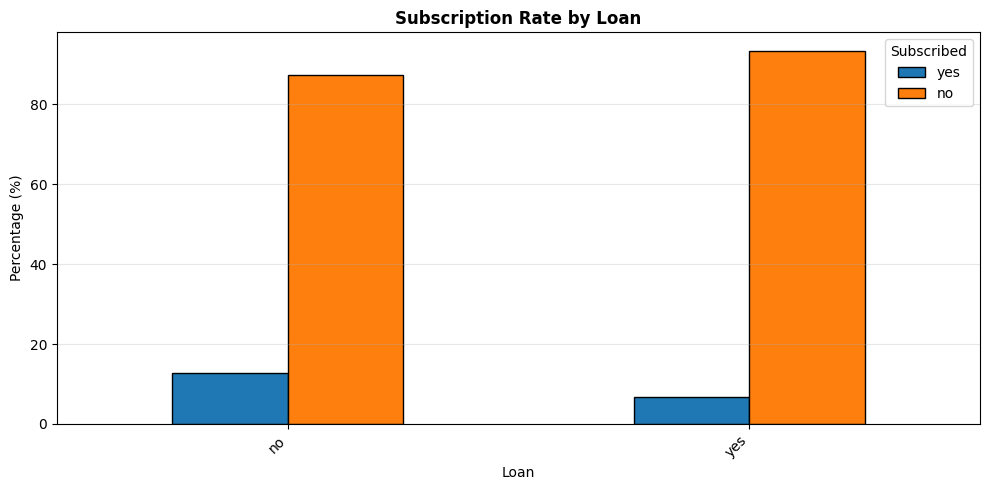

CONTACT vs Subscription Rate (%)
y            yes     no
contact                
cellular   14.92  85.08
telephone  13.42  86.58
unknown     4.07  95.93


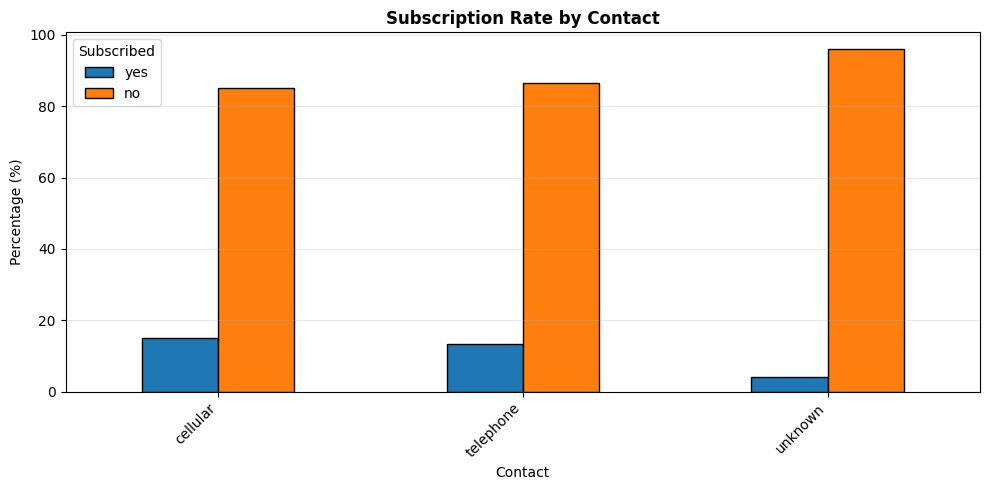

MONTH vs Subscription Rate (%)
y        yes     no
month              
mar    51.99  48.01
dec    46.73  53.27
sep    46.46  53.54
oct    43.77  56.23
apr    19.68  80.32
feb    16.65  83.35
aug    11.01  88.99
jun    10.22  89.78
nov    10.15  89.85
jan    10.12  89.88
jul     9.09  90.91
may     6.72  93.28


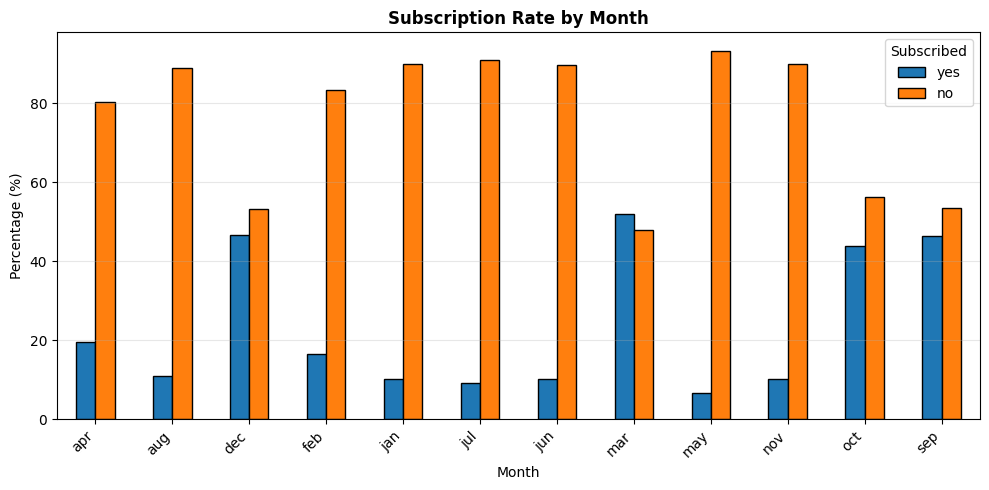

POUTCOME vs Subscription Rate (%)
y           yes     no
poutcome              
success   64.73  35.27
other     16.68  83.32
failure   12.61  87.39
unknown    9.16  90.84


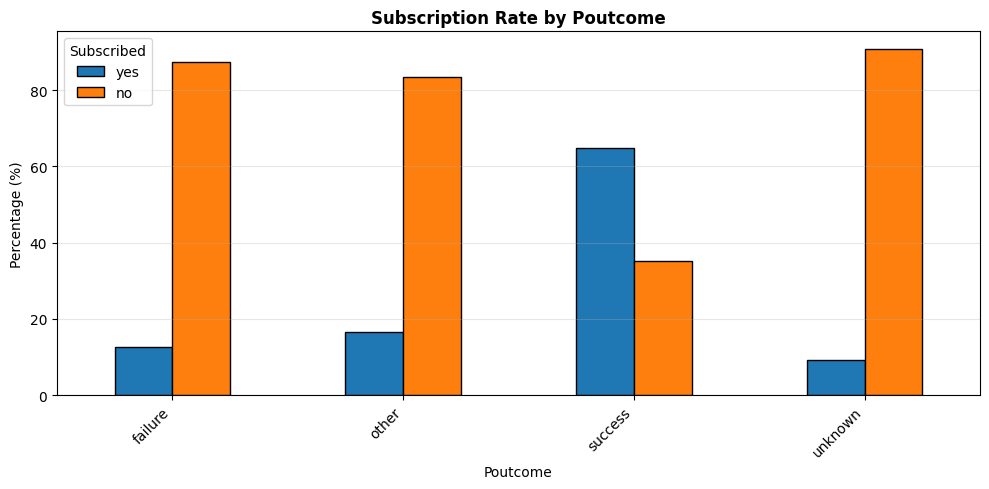

In [7]:
categorical_cols = [
    'job', 'marital', 'education', 'default', 'housing',
    'loan', 'contact', 'month', 'poutcome'
]

for col in categorical_cols:
    print('='*40)
    print(f"{col.upper()} vs Subscription Rate (%)")
    print('='*40)

    # Percentage table
    ct = pd.crosstab(df[col], df['y'], normalize='index') * 100
    ct = ct[['yes', 'no']]  # ensure order
    print(ct.round(2).sort_values('yes', ascending=False))

    # Plot YES & NO together
    ct.plot(kind='bar', figsize=(10,5), edgecolor='black')
    plt.title(f"Subscription Rate by {col.title()}", fontweight='bold')
    plt.xlabel(col.title())
    plt.ylabel("Percentage (%)")
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Subscribed")
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()


Observations (Categorical Features)

Job type:
Job type has a clear impact on subscription rate. From the chart, we can see that students and retired clients are more likely to subscribe compared to other job categories.

Marital status:
Marital status also affects the subscription rate. We observe that single clients are more likely to subscribe compared to married and divorced clients.

Education level:
Education level shows an influence on subscription. Most subscribers are from tertiary and secondary education levels, while fewer are from primary education. This indicates that clients with tertiary and secondary education should be the main target group.

Default:
Having credit in default does not seem to have a significant impact on the subscription rate.

Housing loan:
Clients who do not have a housing loan are more likely to subscribe compared to those who have a housing loan, showing that housing loan status affects subscription behavior.

Personal loan:
Clients who do not have a personal loan make up most of the subscribers, while clients who have taken a loan show a lower subscription rate.

Contact type:
The type of contact (cellular or telephone) does not show a strong impact on the subscription rate, as both show a similar conversion rate.

Month:
The month of contact has a clear impact on subscription. The highest subscription rates are observed in March, October, September, and December, indicating that these are good months to run marketing campaigns.

Previous campaign outcome (poutcome):
The result of the previous campaign has a strong influence. Clients who had a successful outcome in the previous campaign have a much higher subscription rate compared to others.

## Statistical Summary of Numerical Features

In this section, we calculate basic statistical measures such as mean, median, mode,
standard deviation, minimum, maximum, and range to better understand the distribution
and spread of numerical variables in the dataset.

In [6]:
# Analyzing Numeric columns
# stastistic values

print("="*20)
print("Statistics Summary")
print("="*20)

def numeric_stats(data):
  print(f"Mean: {df[data].mean():.2f}")
  print(f"Median: {df[data].median():.2f}")
  print(f"Mode: {df[data].mode()[0]:.2f}")
  print(f"Standard Deviation: {df[data].std():.2f}")
  print(f"Minimum: {df[data].min():.2f}")
  print(f"Maximum: {df[data].max():.2f}")
  print(f"range: {df[data].max()-df[data].min():.2f}")

numeric_stats('day')


Statistics Summary
Mean: 15.81
Median: 16.00
Mode: 20.00
Standard Deviation: 8.32
Minimum: 1.00
Maximum: 31.00
range 30.00


📌 Observations from Statistical Summary (Day of Contact)

The average (mean) day of contact is around **16**, and the median is also **16**, which means most calls are made around the middle of the month.

The minimum value is **1** and the maximum is **31**, showing that calls are spread across the entire month.

The standard deviation of about **8.3** indicates that the contact days are fairly spread out rather than concentrated on only a few days.

The range of **30** days confirms that the bank contacts clients throughout the whole month.

From this, we can say that the **day of the month alone does not show any strong pattern** and needs further analysis with the subscription outcome to see if it has any real impact.

In [ ]:
# Target varible percentile check:
df['y'].value_counts(normalize=True) * 100

# finding: 88.30 % are no while the 12% people are a active in campaign

,proportion
y,
no,88.30152
yes,11.69848


AGE - Subscriber vs Non Subscriber
       count       mean        std   min   25%   50%   75%   max
y                                                               
no   39922.0  40.838986  10.172662  18.0  33.0  39.0  48.0  95.0
yes   5289.0  41.670070  13.497781  18.0  31.0  38.0  50.0  95.0


<Figure size 1000x500 with 0 Axes>

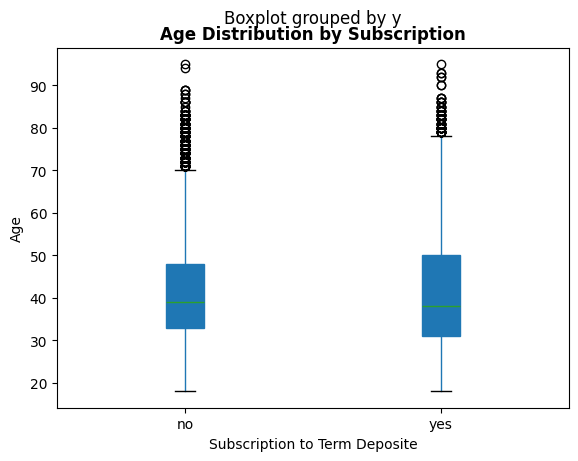

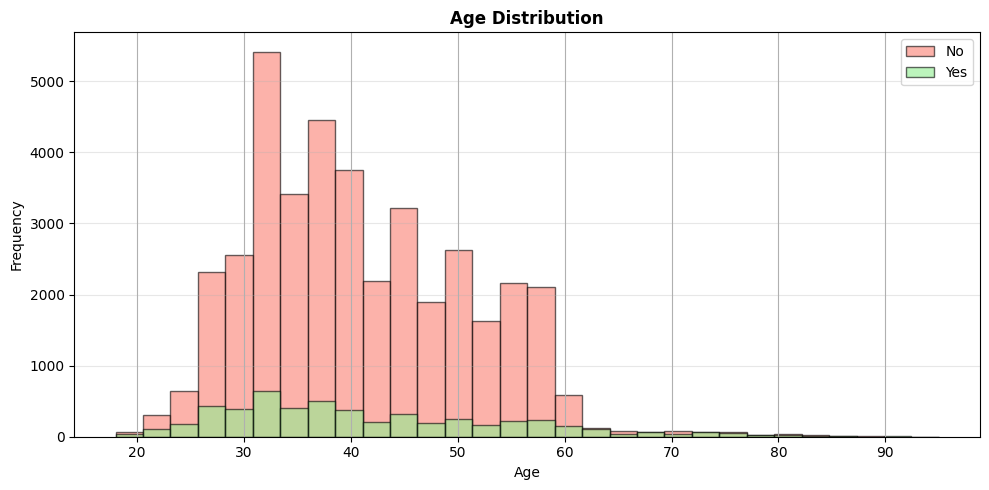

BALANCE - Subscriber vs Non Subscriber
       count         mean          std     min    25%    50%     75%       max
y                                                                             
no   39922.0  1303.714969  2974.195473 -8019.0   58.0  417.0  1345.0  102127.0
yes   5289.0  1804.267915  3501.104777 -3058.0  210.0  733.0  2159.0   81204.0


<Figure size 1000x500 with 0 Axes>

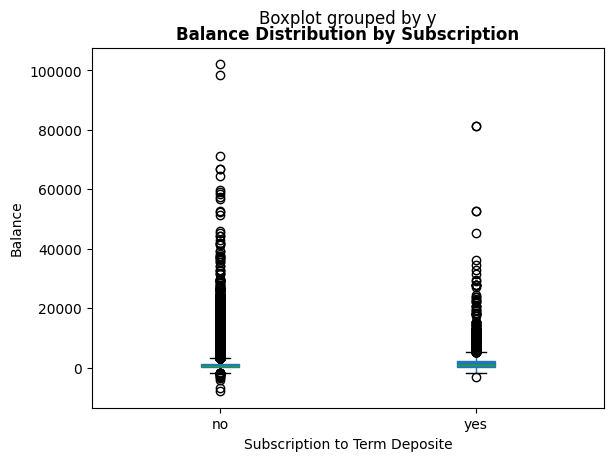

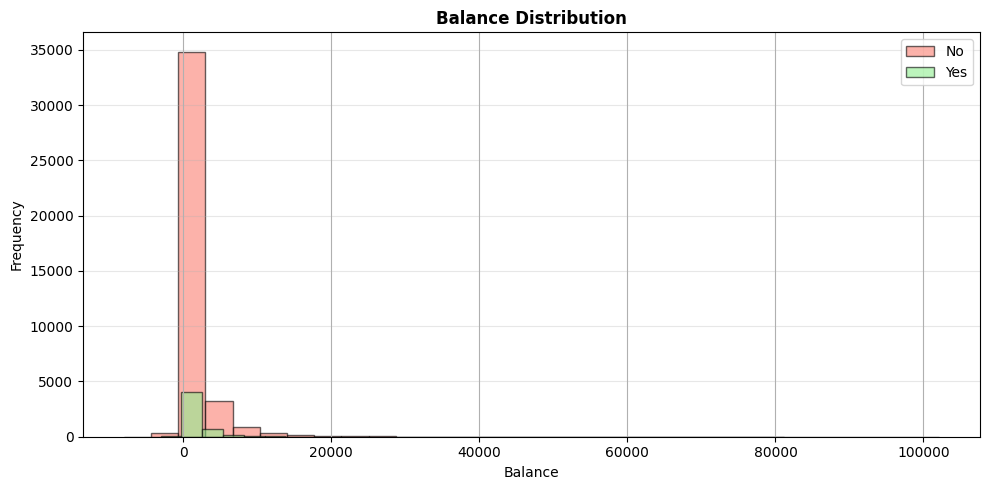

DAY - Subscriber vs Non Subscriber
       count       mean       std  min  25%   50%   75%   max
y                                                            
no   39922.0  15.892290  8.294728  1.0  8.0  16.0  21.0  31.0
yes   5289.0  15.158253  8.501875  1.0  8.0  15.0  22.0  31.0


<Figure size 1000x500 with 0 Axes>

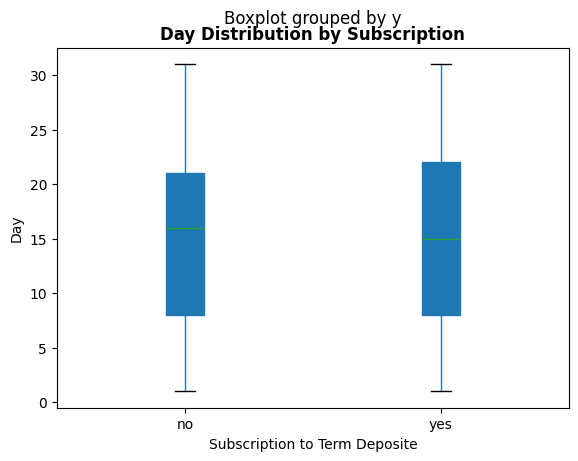

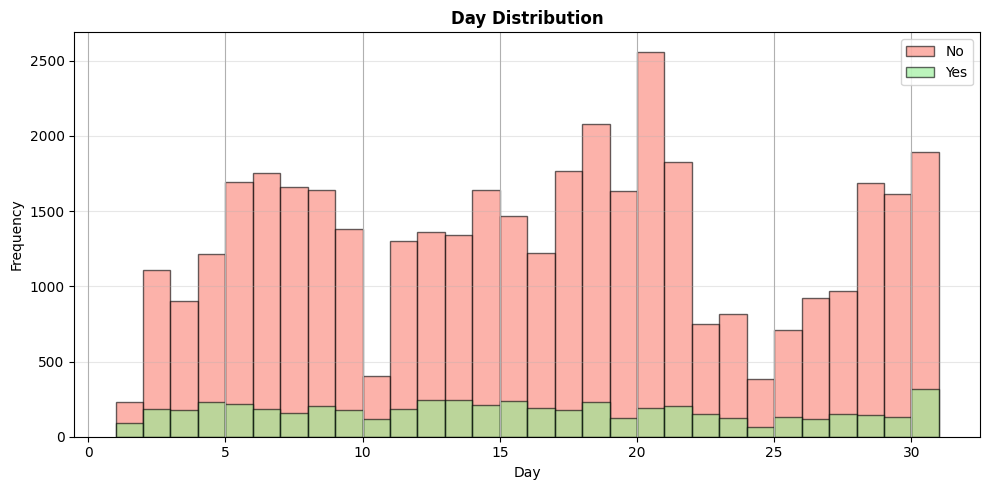

DURATION - Subscriber vs Non Subscriber
       count        mean         std  min    25%    50%    75%     max
y                                                                     
no   39922.0  221.182806  207.383237  0.0   95.0  164.0  279.0  4918.0
yes   5289.0  537.294574  392.525262  8.0  244.0  426.0  725.0  3881.0


<Figure size 1000x500 with 0 Axes>

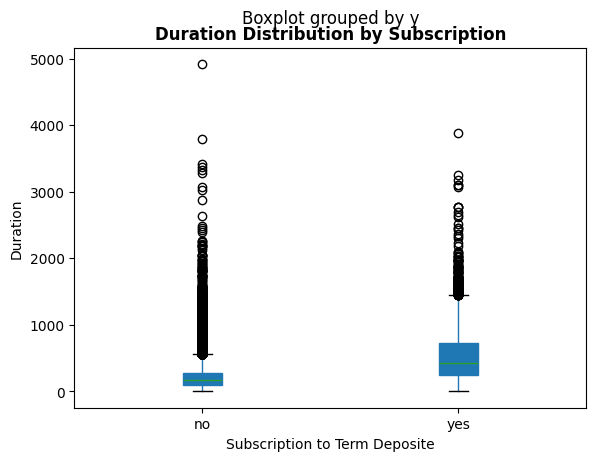

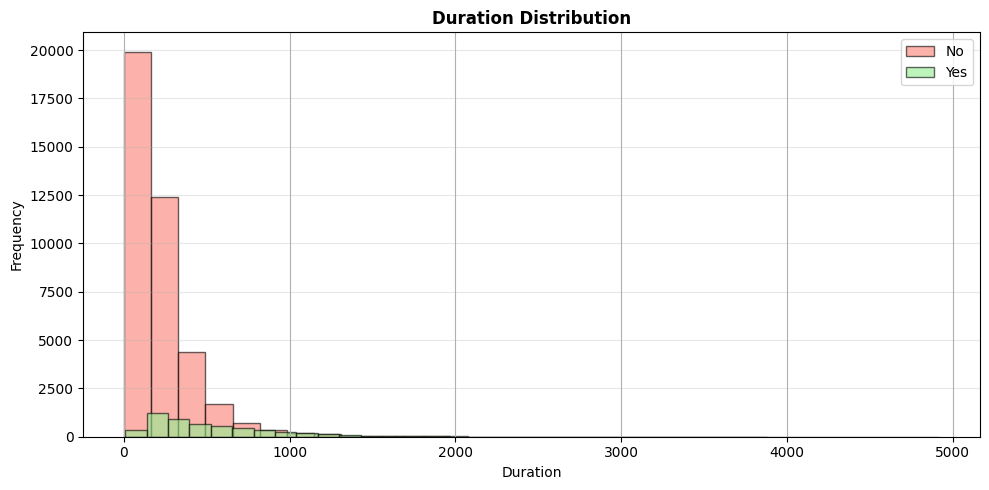

CAMPAIGN - Subscriber vs Non Subscriber
       count      mean       std  min  25%  50%  75%   max
y                                                         
no   39922.0  2.846350  3.212767  1.0  1.0  2.0  3.0  63.0
yes   5289.0  2.141047  1.921826  1.0  1.0  2.0  3.0  32.0


<Figure size 1000x500 with 0 Axes>

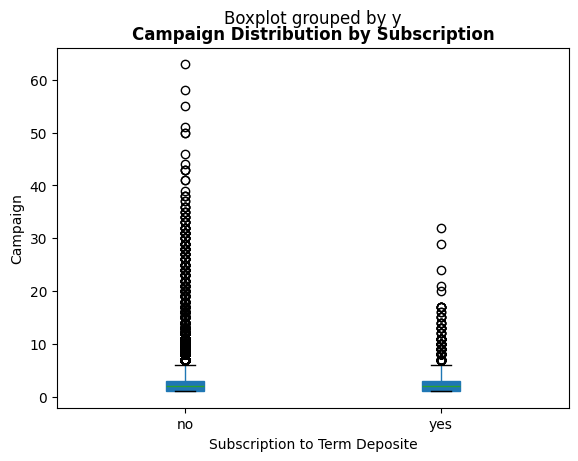

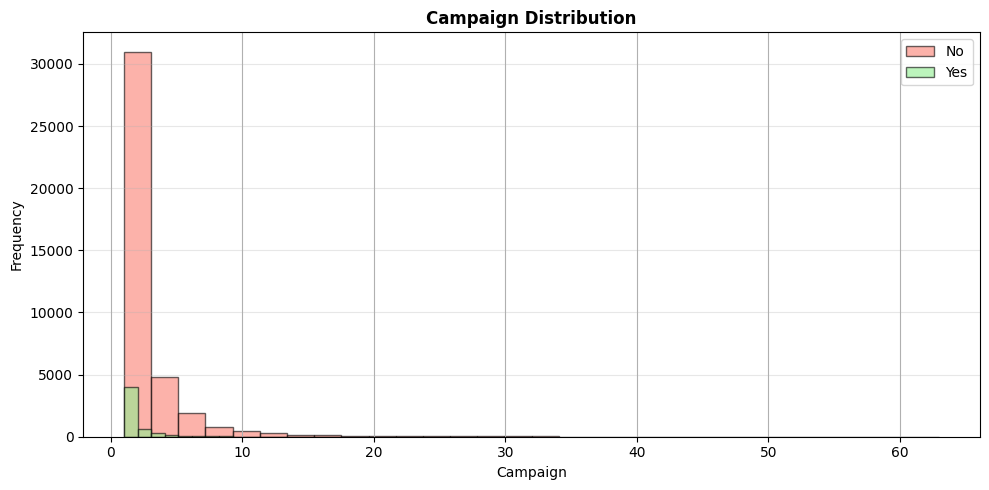

PDAYS - Subscriber vs Non Subscriber
       count       mean         std  min  25%  50%   75%    max
y                                                              
no   39922.0  36.421372   96.757135 -1.0 -1.0 -1.0  -1.0  871.0
yes   5289.0  68.702968  118.822266 -1.0 -1.0 -1.0  98.0  854.0


<Figure size 1000x500 with 0 Axes>

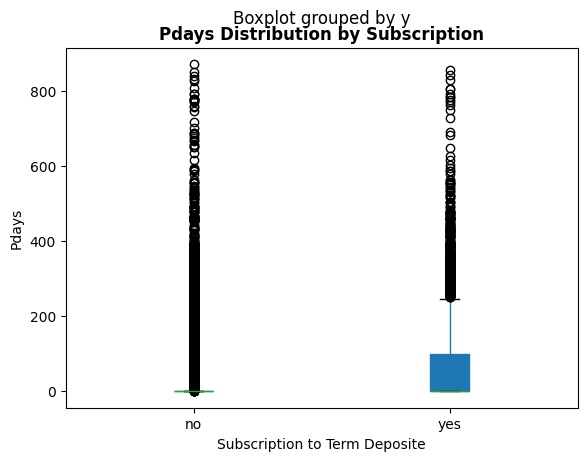

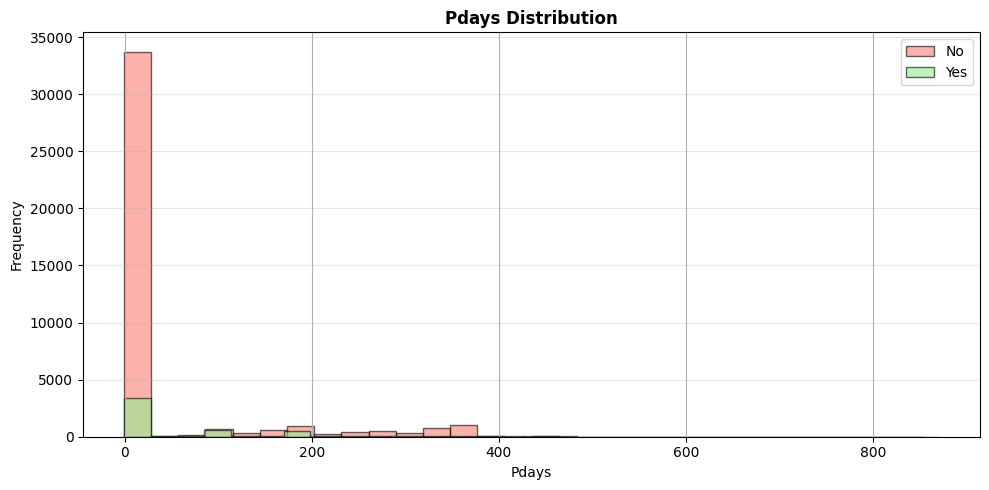

PREVIOUS - Subscriber vs Non Subscriber
       count      mean       std  min  25%  50%  75%    max
y                                                          
no   39922.0  0.502154  2.256771  0.0  0.0  0.0  0.0  275.0
yes   5289.0  1.170354  2.553272  0.0  0.0  0.0  1.0   58.0


<Figure size 1000x500 with 0 Axes>

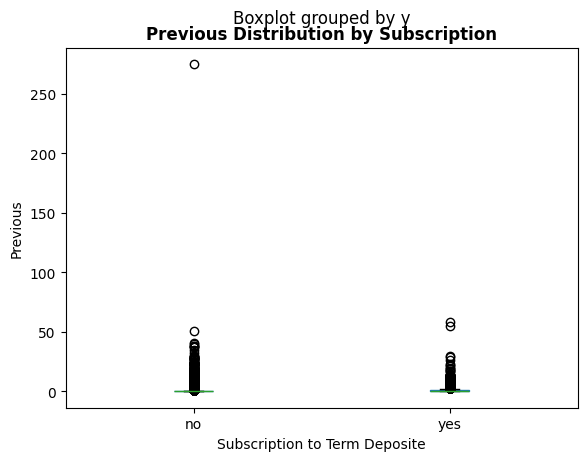

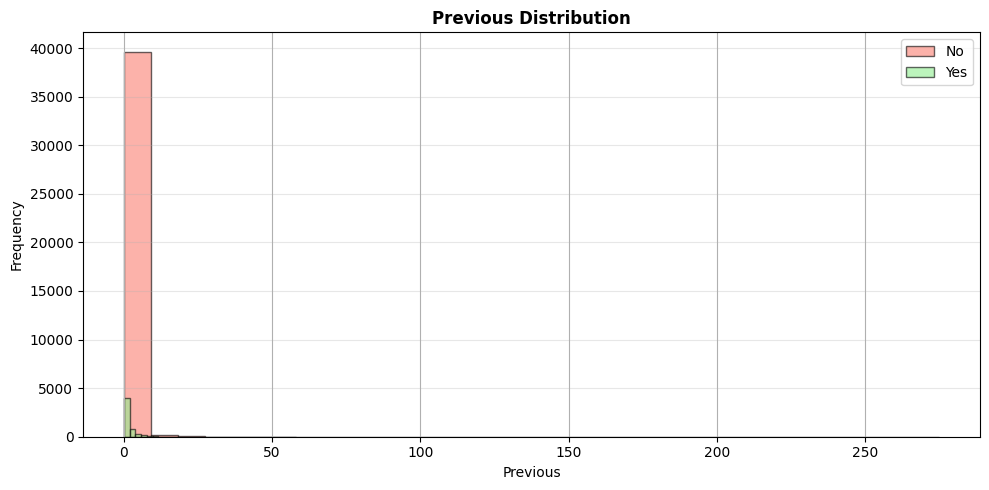

In [ ]:
# NUMERIC FEATURES vs TARGET

numeric_cols = [
    'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'
]

for col in numeric_cols:
  print('='*40)
  print(f"{col.upper()} - Subscriber vs Non Subscriber")
  print('='*40)

  #statistic by target
  print(df.groupby('y')[col].describe())

  #boxplot comparison
  plt.figure(figsize=(10, 5))
  df.boxplot(column=col, by='y', grid=False, patch_artist=True)
  plt.title(f"{col.title()} Distribution by Subscription", fontweight='bold')
  plt.xlabel('Subscription to Term Deposite')

  plt.ylabel(col.title())
  plt.tight_layout
  plt.show()

  # Dsitribution plot
  plt.figure(figsize=(10, 5))
  df[df['y'] == 'no'][col].hist(bins=30, alpha=0.6, label='No', color='salmon', edgecolor='black')
  df[df['y'] == 'yes'][col].hist(bins=30, alpha=0.6, label='Yes', color='lightgreen', edgecolor='black')
  plt.title(f'{col.title()} Distribution', fontweight='bold')
  plt.xlabel(col.title())
  plt.ylabel('Frequency')
  plt.legend()
  plt.grid(axis='y', alpha=0.3)
  plt.tight_layout()
  plt.show()

**Age**

The average age of subscribers** (41)** is slightly higher than non-subscribers
**(40)**, which means older clients are slightly more likely to subscribe.

**Balance**

Subscribers have a higher average balance **(≈1804)** compared to non-subscribers **(≈1304)**, **suggesting that higher-balance clients are more likely to subscribe.**

**Day**

The day of the month does not show any meaningful difference between subscribers and non-subscribers, so it has little impact.

**Duration**

This is the strongest feature. Subscribers have much longer call durations on average, showing a strong relationship with successful subscription.

**Campaign**

Clients who subscribe are contacted fewer times on average,which suggests too many calls reduce the chance of success.

**Pdays**

This feature shows a weak and unclear pattern because most values are -1 for both groups.

**Previous**
This shows only a small difference and has weak influence.


Correlation Matrix
               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.009120 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.004503  0.021560 -0.014578  0.003435  0.016674
day      -0.009120  0.004503  1.000000 -0.030206  0.162490 -0.093044 -0.051710
duration -0.004648  0.021560 -0.030206  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578  0.162490 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.093044 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674 -0.051710  0.001203 -0.032855  0.454820  1.000000


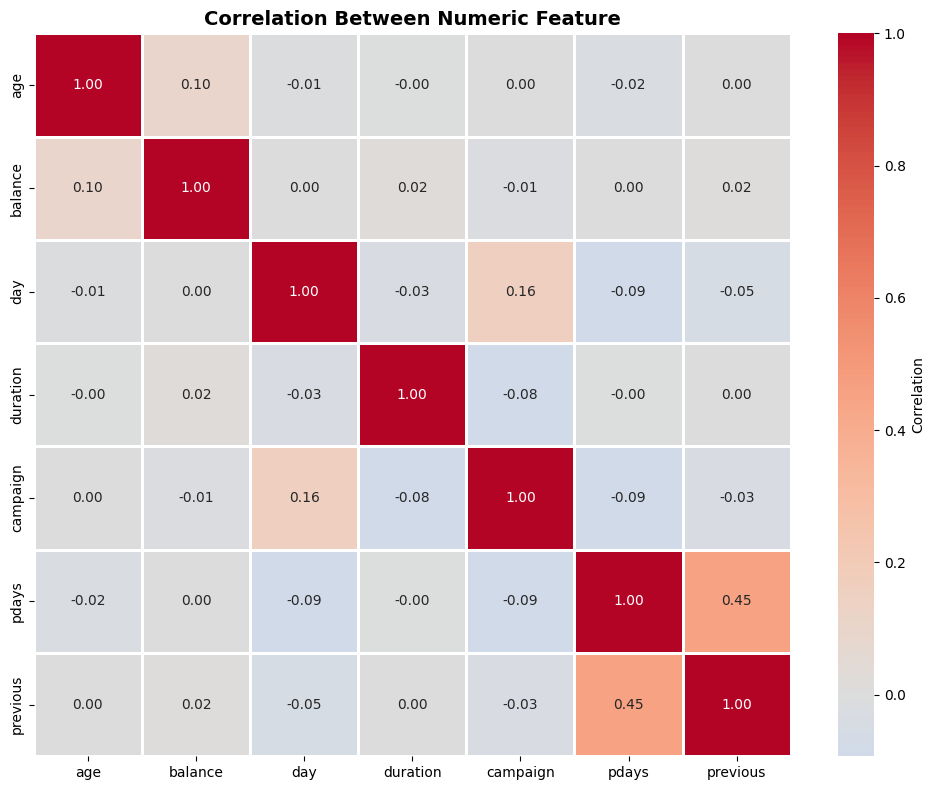


STRONG CORRELATIONS (|correlation| > 0.5):


In [ ]:
# correlation analysis

correlation = df[numeric_cols].corr()

print('Correlation Matrix')
print('='*60)
print(correlation)


#Heat map visualization

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', linewidths=1, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Between Numeric Feature', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

#strong correlations (>0.5 or <-0.5)
print("\nSTRONG CORRELATIONS (|correlation| > 0.5):")
print("="*60)
for i in range(len(correlation.columns)):
    for j in range(i+1, len(correlation.columns)):
        if abs(correlation.iloc[i, j]) > 0.5:
            print(f"{correlation.columns[i]} <-> {correlation.columns[j]}: {correlation.iloc[i, j]:.2f}")

## 📌 Observation (Correlation Analysis)

From the correlation heatmap, we can see that most **numerical features have very weak or near-zero correlation with each other**, which means they are **largely independent and do not strongly move together.**
The only noticeable relationship is between **pdays and previous, which shows a moderate positive correlation, indicating that clients who were contacted before tend to have higher values in both variables**. Apart from this, features like age, balance, duration, and campaign do not show strong linear relationships with each other, suggesting that multicollinearity is not a major issue in this dataset.

In [ ]:
#Oulier Detection uisng IQR

def Outlier_detect(data):
  Q1 = df[data].quantile(0.25)
  Q3 = df[data].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  ouliers = df[(df[data]< lower_bound) | (df[data] > upper_bound)]
  print(f"0.25 of Data: {Q1}")
  print(f"0.75 of Data: {Q3}")
  print(f"IQR: {IQR}")
  print(f"Lower Bound: {lower_bound}")
  print(f"Upper Bound: {upper_bound}")
  return len(ouliers)

for col in numeric_cols:
  print(f"outlier in column: {col}")
  print(f"Outliers in {col}: {Outlier_detect(col)}")
  print()

outlier in column: age
0.25 of Data: 33.0
0.75 of Data: 48.0
IQR: 15.0
Lower Bound: 10.5
Upper Bound: 70.5
Outliers in age: 487

outlier in column: balance
0.25 of Data: 72.0
0.75 of Data: 1428.0
IQR: 1356.0
Lower Bound: -1962.0
Upper Bound: 3462.0
Outliers in balance: 4729

outlier in column: day
0.25 of Data: 8.0
0.75 of Data: 21.0
IQR: 13.0
Lower Bound: -11.5
Upper Bound: 40.5
Outliers in day: 0

outlier in column: duration
0.25 of Data: 103.0
0.75 of Data: 319.0
IQR: 216.0
Lower Bound: -221.0
Upper Bound: 643.0
Outliers in duration: 3235

outlier in column: campaign
0.25 of Data: 1.0
0.75 of Data: 3.0
IQR: 2.0
Lower Bound: -2.0
Upper Bound: 6.0
Outliers in campaign: 3064

outlier in column: pdays
0.25 of Data: -1.0
0.75 of Data: -1.0
IQR: 0.0
Lower Bound: -1.0
Upper Bound: -1.0
Outliers in pdays: 8257

outlier in column: previous
0.25 of Data: 0.0
0.75 of Data: 0.0
IQR: 0.0
Lower Bound: 0.0
Upper Bound: 0.0
Outliers in previous: 8257



📌 Observation (Outlier Analysis)

From the outlier analysis, we can see that several numerical features such as balance, duration, campaign, age, pdays, and previous contain a significant number of outliers, while the day column does not show any outliers. In particular, balance and duration have a large number of extreme values, which is expected in real-world banking data because some clients naturally have very high balances or very long call durations. The columns pdays and previous show many outliers because most values are concentrated at 0 or -1, which represents special cases in the dataset.

These **outliers were not removed because they represent valid and meaningful real-world situations rather than data errors.** Removing them could lead to loss of important information, especially for high-value clients or unusually successful campaign interactions.

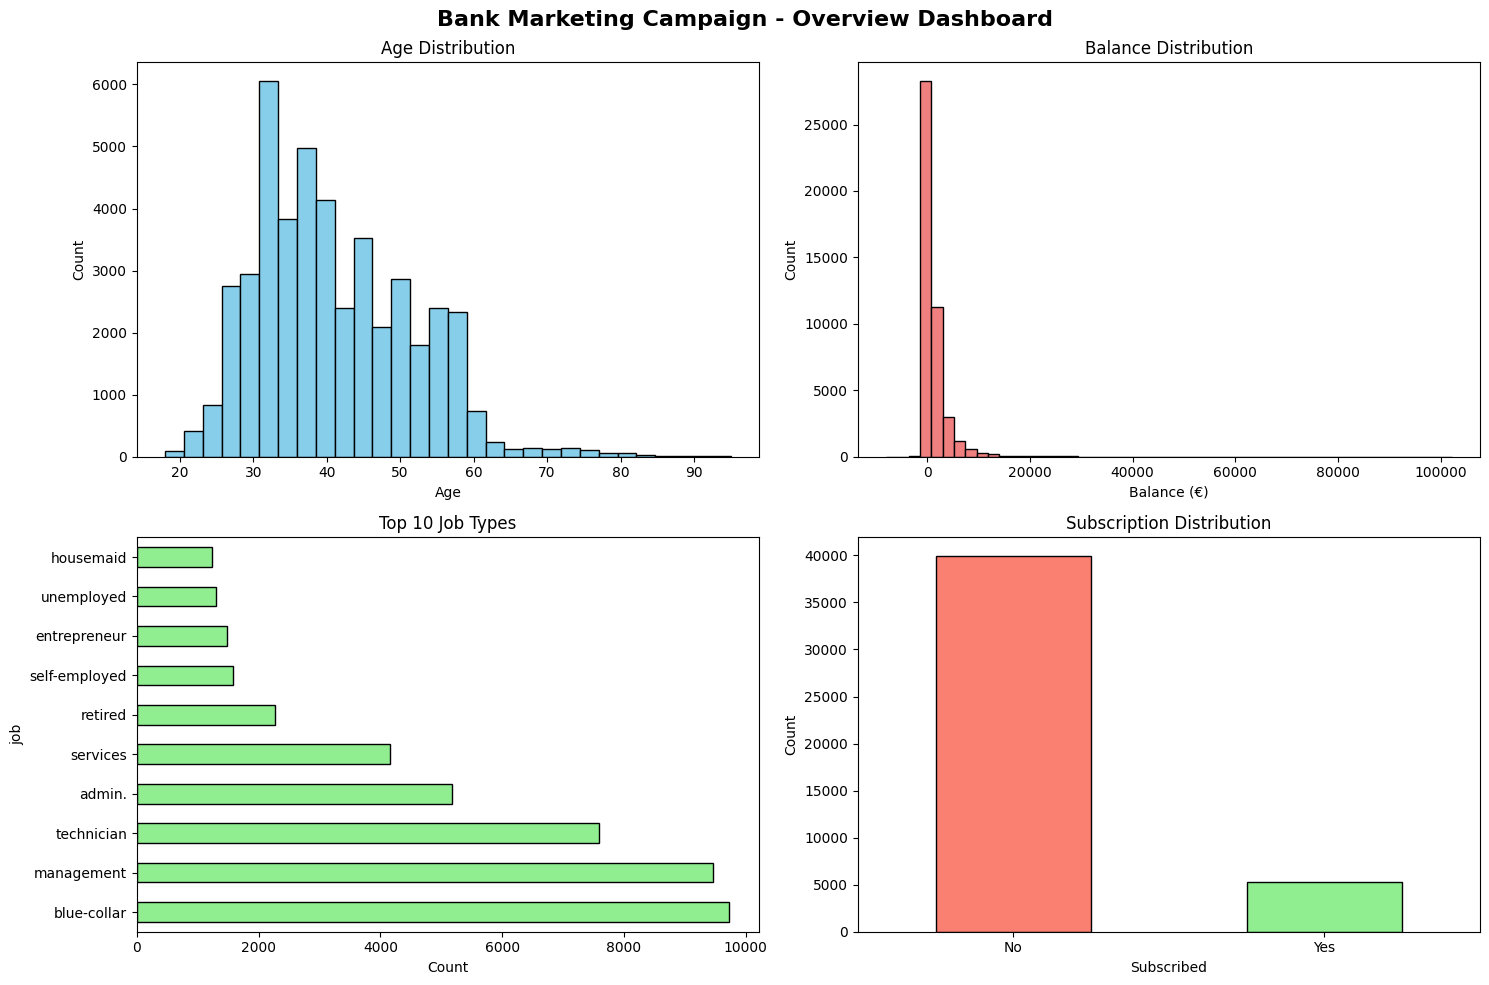

In [ ]:
# ======================
# SUMMARY VISUALIZATIONS DASHBOARD
# ======================

# 1. Overall Distribution Dashboard
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Bank Marketing Campaign - Overview Dashboard', fontsize=16, fontweight='bold')

# Age distribution
axes[0, 0].hist(df['age'], bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')

# Balance distribution
axes[0, 1].hist(df['balance'], bins=50, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Balance Distribution')
axes[0, 1].set_xlabel('Balance (€)')
axes[0, 1].set_ylabel('Count')

# Job distribution
df['job'].value_counts().head(10).plot(kind='barh', ax=axes[1, 0], color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Top 10 Job Types')
axes[1, 0].set_xlabel('Count')

# Target variable
df['y'].value_counts().plot(kind='bar', ax=axes[1, 1], color=['salmon', 'lightgreen'], edgecolor='black')
axes[1, 1].set_title('Subscription Distribution')
axes[1, 1].set_xlabel('Subscribed')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_xticklabels(['No', 'Yes'], rotation=0)

plt.tight_layout()
plt.show()

The dashboard above summarizes the overall distribution of key variables and gives a final high-level view of the dataset. Based on all the analysis performed, we can now present the final conclusions of this project.


## ✍🏻 Final Conclusion

In this project, we analyzed the UCI Bank Marketing Campaign dataset to understand what factors influence whether a client subscribes to a term deposit. From the analysis, we found that both categorical and numerical features play an important role in the subscription decision.

Among categorical features, job type, education level, month of contact, and previous campaign outcome show a clear impact on subscription rate. **Clients who are students or retired, those with higher education,** and those who were contacted in **certain months** or had successful previous campaigns are more likely to subscribe.

Among numerical features, **call duration is the strongest factor related to subscription, followed by account balance and number of campaign contacts**. Clients with longer call durations, higher balances, and fewer repeated contacts have a higher chance of subscribing.

Although **several features contain outliers**, they were not **removed** because they represent real and meaningful business cases. Overall, this analysis shows that targeting the right client segments and improving call quality and timing can significantly improve the success of future marketing campaigns.

##💡 Business Recommendations

Based on the analysis of the bank marketing campaign data, the following actions are recommended to improve the success rate of future campaigns.


1. The bank should **focus more on high-potential customer** segments, **especially students and retired clients**, as these groups show higher subscription rates. **Clients with higher education levels** and **higher account balances** should also be **prioritized**.
2.  The bank should **optimize call quality rather than call quantity**. Since call duration has the strongest relationship with successful subscription and repeated contacts reduce success rate, agents should focus on **having fewer but more meaningful and higher-quality conversations** with clients.

3.   Marketing campaigns should be timed better during **high-performing months** such as **March, September, October, and December**, when subscription rates are higher.
4.    Clients who had a **successful outcome in previous campaigns** should be given higher priority, as they are much more likely to subscribe again.

Finally, instead of applying the same strategy to all clients, the bank should **use data-driven targeting** to segment customers and focus marketing efforts where the probability of success is highest. This can reduce costs and significantly improve conversion rates.
